In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay


In [7]:
iris=load_iris()
X,Y=iris.data,iris.target


In [8]:
print("Feature names:",iris.feature_names)
print("target names:",iris.target_names)
print("Shape of dataset:",X.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
Shape of dataset: (150, 4)


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y,random_state=42,stratify=Y
)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
clf_multinomial=LogisticRegression(
    multi_class='multinomial',solver='lbfgs',max_iter=500
)

In [12]:
clf_ovr=LogisticRegression(
    multi_class='ovr',solver='lbfgs',max_iter=500
)

In [13]:
clf_multinomial.fit(X_train,Y_train)
clf_ovr.fit(X_train,Y_train)

C:\Users\ANIKET DEY\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ANIKET DEY\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'ovr'


In [14]:
y_pred_multi=clf_multinomial.predict(X_test)
y_pred_ovr=clf_ovr.predict(X_test)


In [16]:
print("\n=== Multinomial Logistic Regression ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_multi))
print("Classification Report:\n", classification_report(Y_test, y_pred_multi, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_multi))

print("\n=== One-vs-Rest Logistic Regression ===")
print("Accuracy:", accuracy_score(Y_test, y_pred_ovr))
print("Classification Report:\n", classification_report(Y_test, y_pred_ovr, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_ovr))



=== Multinomial Logistic Regression ===
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

=== One-vs-Rest Logistic Regression ===
Accuracy: 0.8157894736842105
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        12
  versicolor       0.75      0.69      0.72        13
   virginica       0.73      0.85      0.79        13

    accuracy                           0.82        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.82      0.82      0.82      

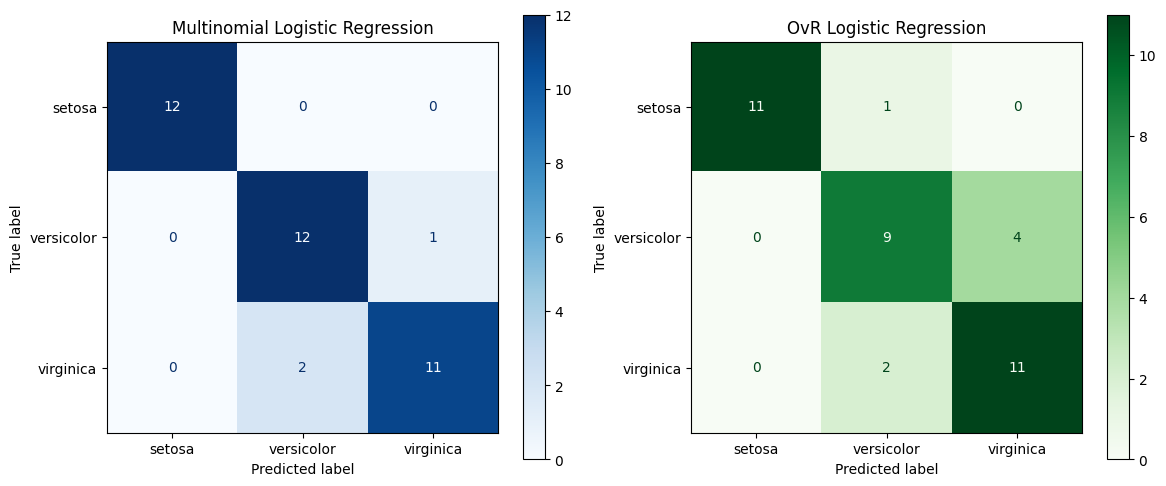

In [18]:
# 9. Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(clf_multinomial, X_test, Y_test,
                                      display_labels=iris.target_names,
                                      cmap=plt.cm.Blues, ax=axes[0], values_format='d')
axes[0].set_title("Multinomial Logistic Regression")

ConfusionMatrixDisplay.from_estimator(clf_ovr, X_test, Y_test,
                                      display_labels=iris.target_names,
                                      cmap=plt.cm.Greens, ax=axes[1], values_format='d')
axes[1].set_title("OvR Logistic Regression")

plt.tight_layout()
plt.show()
